In [155]:
# imports de libs que usamos para leer y procesar datos en masa
import os

import numpy as np
import pandas as pd
import requests
import io
# lib que usamos para mostrar las imágenes
import matplotlib.pyplot as plt

# libs que usamos para tareas generales de machine learning: separar conjuntos de datos, evaluar exactitud, etc
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

# libs que usamos para construir y entrenar redes neuronales
from keras.models import Sequential
from keras.layers import Dense, Input, Dropout, Convolution2D, MaxPooling2D, Flatten
from keras.preprocessing.image import ImageDataGenerator, load_img
from IPython.display import HTML, display
# configuración para que las imágenes se vean dentro del notebook
%matplotlib inline

In [156]:
from IPython.core.debugger import set_trace
#import pixiedust

In [157]:
def load_notebook_config(width=True):
    pd.options.display.max_columns = 0
    plt.rcParams.update({
        "font.family": ["serif"],
        "font.sans-serif": ["Roboto"],
        "font.size": 9,
        "axes.labelsize": 11,
        "axes.titlesize": 13,
        "xtick.labelsize": 11,
        "ytick.labelsize": 11,
        "legend.fontsize": 11,
        'figure.figsize': (15.0, 4.0),
        'axes.grid': False,
        'axes.spines.left': True,
        'axes.spines.right': True,
        'axes.spines.top': True,
        'axes.spines.bottom': True,
    })
    if width:
        display(HTML("<style>.container { width:90% !important; }</style>"))

load_notebook_config()

In [3]:
# algunas configuraciones generales respecto a las imagenes
PICTURE_SIZE = 64
CHANNELS = 'rgb'

INPUT_COLUMNS = []

for color in CHANNELS:
    INPUT_COLUMNS.extend(['%s%i' % (color, i)
                          for i in range(PICTURE_SIZE ** 2)])


In [4]:
#data= pd.read_csv('./dataset/list_attr_celeba.csv',sep=',',usecols=['image_id','Smiling'],dtype=str)
data= pd.read_csv('./dataset/list_attr_celeba.csv',sep=',',usecols=['image_id','Smiling'])

In [5]:
data['Smiling']=np.where(data['Smiling']==1,'Si','No')

In [6]:
data_patition=pd.read_csv('./dataset/list_eval_partition.csv',sep=',',usecols=['image_id','partition'])

In [178]:
#IMAGEDIR=os.path.dirname('/home/viki/projects/MachineLearning/dataset/img_align_celeba/')
IMAGEDIR='./imagenes_tp3_cv/'

In [175]:
def show_images(samples):
    for index,sample in samples.iterrows():
        #set_trace()
        num_img=sample['image_id']
        image=load_img(os.path.join(IMAGEDIR,num_img))
        display(sample['Smiling'])
        display(image)
    

'No'

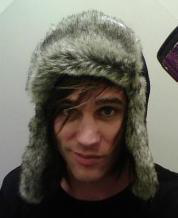

'No'

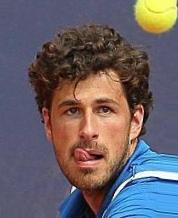

'No'

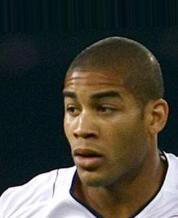

'No'

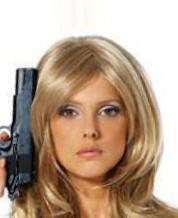

'No'

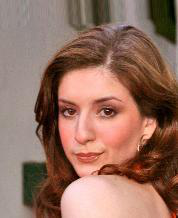

In [179]:
show_images(data.sample(5))
#train_df.sample(5)

In [11]:
data_patition.sample(5)

image_id  partition
157135  157136.jpg          0
2151    002152.jpg          0
87987   087988.jpg          0
41224   041225.jpg          0
197213  197214.jpg          2

In [12]:
#train=data.where[data_patition['image_id']==data['image_id'] and data_patition['patition']==0]

df_merge = pd.merge(data, data_patition, how='inner', on = 'image_id')

df_merge.partition.isnull().sum()

0

In [13]:
train=df_merge[df_merge['partition']==0]
test=df_merge[df_merge['partition']==1]
validation=df_merge[df_merge['partition']==2]

train=train.drop(['partition'],axis=1)
test=test.drop(['partition'],axis=1)
validation=validation.drop(['partition'],axis=1)



In [14]:
display(train)
display(test)
display(validation)

image_id Smiling
0       000001.jpg      Si
1       000002.jpg      Si
2       000003.jpg      No
3       000004.jpg      No
4       000005.jpg      No
...            ...     ...
162765  162766.jpg      No
162766  162767.jpg      Si
162767  162768.jpg      Si
162768  162769.jpg      Si
162769  162770.jpg      No

[162770 rows x 2 columns]

image_id Smiling
162770  162771.jpg      Si
162771  162772.jpg      Si
162772  162773.jpg      No
162773  162774.jpg      Si
162774  162775.jpg      No
...            ...     ...
182632  182633.jpg      No
182633  182634.jpg      No
182634  182635.jpg      Si
182635  182636.jpg      No
182636  182637.jpg      No

[19867 rows x 2 columns]

image_id Smiling
182637  182638.jpg      Si
182638  182639.jpg      No
182639  182640.jpg      Si
182640  182641.jpg      Si
182641  182642.jpg      Si
...            ...     ...
202594  202595.jpg      No
202595  202596.jpg      Si
202596  202597.jpg      Si
202597  202598.jpg      Si
202598  202599.jpg      No

[19962 rows x 2 columns]

In [15]:
train.isnull().sum()

image_id    0
Smiling     0
dtype: int64

In [16]:
data_patition.partition.value_counts()

0    162770
2     19962
1     19867
Name: partition, dtype: int64

#################### train labels ####################


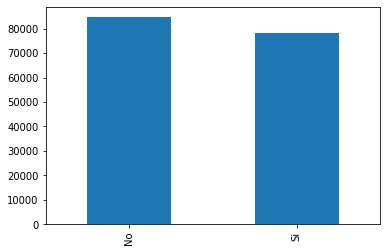

#################### test labels ####################


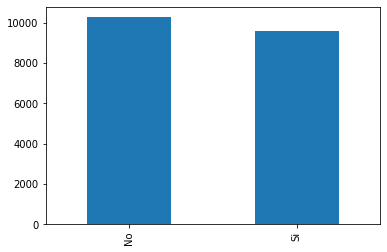

In [17]:
sets=(('train',train),('test',test))

for set_name,set_data in sets:
    print('#'*20, set_name,'labels','#' * 20)
    set_data.Smiling.value_counts().plot.bar()
    plt.show()

In [180]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
)
test_datagen = ImageDataGenerator(
    rescale=1./255,
)
train_generator = train_datagen.flow_from_dataframe(
    dataframe=train,
    directory=IMAGEDIR,
    x_col='image_id',
    y_col='Smiling',
    class_mode="binary",
    batch_size=32,
    shuffle=True,
    seed=42,
    target_size=(70, 70)
)

val_generator = train_datagen.flow_from_dataframe(
    dataframe=validation,
    directory=IMAGEDIR,
    x_col='image_id',
    y_col='Smiling',
    class_mode="binary",
    batch_size=32,
    shuffle=True,
    seed=42,
    target_size=(70, 70)
)


test_generator=test_datagen.flow_from_dataframe(
    dataframe=test,
    directory=IMAGEDIR,
    x_col='image_id',
    y_col='Smiling',
    class_mode="binary",
    batch_size=32,
    shuffle=True,
    seed=42,
    target_size=(70, 70)
)

Found 162770 validated image filenames belonging to 2 classes.
Found 19962 validated image filenames belonging to 2 classes.
Found 19867 validated image filenames belonging to 2 classes.


In [181]:
train_datagen_categorical = ImageDataGenerator(
    rescale=1./255,
)
test_datagen_categorical = ImageDataGenerator(
    rescale=1./255,
)
train_generator_categorical = train_datagen.flow_from_dataframe(
    dataframe=train,
    directory=IMAGEDIR,
    x_col='image_id',
    y_col='Smiling',
    class_mode="categorical",
    batch_size=32,
    shuffle=True,
    seed=42,
    target_size=(70, 70)
)

val_generator_categorical = train_datagen.flow_from_dataframe(
    dataframe=validation,
    directory=IMAGEDIR,
    x_col='image_id',
    y_col='Smiling',
    class_mode="categorical",
    batch_size=32,
    shuffle=True,
    seed=42,
    target_size=(70, 70)
)


test_generator_categorical=test_datagen.flow_from_dataframe(
    dataframe=test,
    directory=IMAGEDIR,
    x_col='image_id',
    y_col='Smiling',
    class_mode="categorical",
    batch_size=32,
    shuffle=True,
    seed=42,
    target_size=(70, 70)
)

Found 162770 validated image filenames belonging to 2 classes.
Found 19962 validated image filenames belonging to 2 classes.
Found 19867 validated image filenames belonging to 2 classes.


In [19]:
num_classes=2

In [37]:
SMILING=list(data.Smiling.unique())
SMILING

['Si', 'No']

In [20]:
model = Sequential([
    Dense(10, activation='relu', input_shape=(70,70,3)),
  #  Convolution2D(8, (4, 4), activation='relu', input_shape=(PICTURE_SIZE, PICTURE_SIZE, len(CHANNELS)),),
  #  Convolution2D(8, (4, 4), activation='relu', input_shape=(70,70,3)),
  #  MaxPooling2D(pool_size=(4, 4)),
  #  Dropout(0.2),
    Flatten(),
        
    Dense(10, activation='relu'),
    Dropout(0.2),
    Dense(10, activation='relu'),
   Dropout(0.2),

   Dense(1, activation='sigmoid'),

])

#model.add(Flatten(input_shape=(32,32, 3))
#model.add(Flatten(input_shape=(70,70, 3)))



In [66]:
model2=Sequential([
    Flatten(input_shape=(70,70,3)),
    Dense(10, activation='relu'),
    Dense(10, activation='relu'),
    Dropout(0.2),
    Dense(10, activation='relu'),
    Dropout(0.2),

    Dense(2, activation='softmax'),
])


In [22]:
model3=Sequential([
    Flatten(input_shape=(70,70,3)),

#   Dense(10, activation='relu'),

    
        
#    Dense(10, activation='relu'),
#    Dropout(0.2),
#    Dense(10, activation='relu'),
#   Dropout(0.2),
    
    Dense(250, activation='relu'),
    Dropout(0.2),
    
    Dense(125, activation='relu'),
    Dropout(0.2),
    
    Dense(75, activation='relu'),
    Dropout(0.2),
    
    Dense(30, activation='relu'),
    Dropout(0.2),
    
    Dense(15, activation='relu'),
    Dropout(0.2),
    
    Dense(7, activation='relu'),
    Dropout(0.2),
    
    Dense(3, activation='relu'),
    Dropout(0.2),

    Dense(1, activation='sigmoid'),
])


In [87]:
model4=Sequential([
    Flatten(input_shape=(70,70,3)),

    Dense(250, activation='relu'),
    Dropout(0.2),
    
    Dense(125, activation='relu'),
    Dropout(0.2),
    
    Dense(75, activation='relu'),
    Dropout(0.2),
    
    Dense(30, activation='relu'),
    Dropout(0.2),
    
    Dense(15, activation='relu'),
    Dropout(0.2),
    
    Dense(7, activation='relu'),
    Dropout(0.2),
    
    Dense(3, activation='relu'),
    Dropout(0.2),

   Dense(2, activation='softmax'),
])

In [24]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy','mse'],
)

#print(model.summary())

In [67]:

model2.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy','mse'],
)

print(model2.summary())

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_13 (Flatten)         (None, 14700)             0         
_________________________________________________________________
dense_69 (Dense)             (None, 10)                147010    
_________________________________________________________________
dense_70 (Dense)             (None, 10)                110       
_________________________________________________________________
dropout_44 (Dropout)         (None, 10)                0         
_________________________________________________________________
dense_71 (Dense)             (None, 10)                110       
_________________________________________________________________
dropout_45 (Dropout)         (None, 10)                0         
_________________________________________________________________
dense_72 (Dense)             (None, 2)               

In [26]:
model3.compile(
    optimizer='sgd',
    loss='binary_crossentropy',
    metrics=['accuracy','mse'],
)

print(model3.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 14700)             0         
_________________________________________________________________
dense_9 (Dense)              (None, 250)               3675250   
_________________________________________________________________
dropout_5 (Dropout)          (None, 250)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 125)               31375     
_________________________________________________________________
dropout_6 (Dropout)          (None, 125)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 75)                9450      
_________________________________________________________________
dropout_7 (Dropout)          (None, 75)               

In [88]:
model4.compile(
    optimizer='sgd',
    loss='categorical_crossentropy',
    metrics=['accuracy','mse'],
)

print(model4.summary())

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_14 (Flatten)         (None, 14700)             0         
_________________________________________________________________
dense_89 (Dense)             (None, 250)               3675250   
_________________________________________________________________
dropout_60 (Dropout)         (None, 250)               0         
_________________________________________________________________
dense_90 (Dense)             (None, 125)               31375     
_________________________________________________________________
dropout_61 (Dropout)         (None, 125)               0         
_________________________________________________________________
dense_91 (Dense)             (None, 75)                9450      
_________________________________________________________________
dropout_62 (Dropout)         (None, 75)              

In [29]:
train_generator.reset()
test_generator.reset()
history=model.fit(train_generator, epochs=3, workers=4, validation_data=test_generator)


Epoch 1/3
5087/5087 [==============================] - 166s 33ms/step - loss: 0.6924 - accuracy: 0.5203 - mse: 0.2496 - val_loss: 0.6888 - val_accuracy: 0.5167 - val_mse: 0.2498
Epoch 2/3
5087/5087 [==============================] - 165s 32ms/step - loss: 0.6924 - accuracy: 0.5203 - mse: 0.2496 - val_loss: 0.6925 - val_accuracy: 0.5167 - val_mse: 0.2498
Epoch 3/3
5087/5087 [==============================] - 166s 33ms/step - loss: 0.6923 - accuracy: 0.5203 - mse: 0.2496 - val_loss: 0.6925 - val_accuracy: 0.5167 - val_mse: 0.2497


In [68]:
train_generator_categorical.reset()
test_generator_categorical.reset()
history2=model2.fit(train_generator_categorical, epochs=3, workers=4, validation_data=test_generator_categorical)

Epoch 1/3
5087/5087 [==============================] - 99s 19ms/step - loss: 0.6925 - accuracy: 0.5199 - mse: 0.2496 - val_loss: 0.6926 - val_accuracy: 0.5167 - val_mse: 0.2498
Epoch 2/3
5087/5087 [==============================] - 98s 19ms/step - loss: 0.6924 - accuracy: 0.5203 - mse: 0.2496 - val_loss: 0.6780 - val_accuracy: 0.5167 - val_mse: 0.2498
Epoch 3/3
5087/5087 [==============================] - 102s 20ms/step - loss: 0.6924 - accuracy: 0.5203 - mse: 0.2496 - val_loss: 0.6953 - val_accuracy: 0.5167 - val_mse: 0.2497


In [90]:
train_generator.reset()
test_generator.reset()
history3=model3.fit(train_generator, epochs=3, workers=4, validation_data=test_generator)

Epoch 1/3
5087/5087 [==============================] - 200s 39ms/step - loss: 0.6276 - accuracy: 0.6158 - mse: 0.2199 - val_loss: 0.3460 - val_accuracy: 0.8539 - val_mse: 0.1199
Epoch 2/3
5087/5087 [==============================] - 203s 40ms/step - loss: 0.4405 - accuracy: 0.8127 - mse: 0.1405 - val_loss: 0.3276 - val_accuracy: 0.8801 - val_mse: 0.0919
Epoch 3/3
5087/5087 [==============================] - 245s 48ms/step - loss: 0.3922 - accuracy: 0.8388 - mse: 0.1225 - val_loss: 0.1093 - val_accuracy: 0.8900 - val_mse: 0.0836


In [89]:
train_generator_categorical.reset()
test_generator_categorical.reset()
history4=model4.fit(train_generator_categorical, epochs=3, workers=4, validation_data=test_generator_categorical)

Epoch 1/3
5087/5087 [==============================] - 203s 40ms/step - loss: 0.6927 - accuracy: 0.5198 - mse: 0.2498 - val_loss: 0.6957 - val_accuracy: 0.5167 - val_mse: 0.2497
Epoch 2/3
5087/5087 [==============================] - 266s 52ms/step - loss: 0.6924 - accuracy: 0.5203 - mse: 0.2496 - val_loss: 0.7043 - val_accuracy: 0.5167 - val_mse: 0.2497
Epoch 3/3
5087/5087 [==============================] - 256s 50ms/step - loss: 0.6924 - accuracy: 0.5203 - mse: 0.2496 - val_loss: 0.6998 - val_accuracy: 0.5167 - val_mse: 0.2498


In [91]:
SMILING= list(data.Smiling.unique())
SMILING=['N','S']

In [92]:
def plot_history(history):
    plt.figure(0)  
    plt.plot(history.history['accuracy'],'r')  
    plt.plot(history.history['val_accuracy'],'g')  
    plt.xticks(np.arange(0, 20, 1.0))  
    plt.rcParams['figure.figsize'] = (8, 6)  
    plt.xlabel("Num of Epochs")  
    plt.ylabel("Accuracy")  
    plt.title("Training Accuracy vs Validation Accuracy")  
    plt.legend(['train','validation'])

    plt.figure(1)  
    plt.plot(history.history['loss'],'r')  
    plt.plot(history.history['val_loss'],'g')  
    plt.xticks(np.arange(0, 20, 1.0))  
    plt.rcParams['figure.figsize'] = (8, 6)  
    plt.xlabel("Num of Epochs")  
    plt.ylabel("Loss")  
    plt.title("Training Loss vs Validation Loss")  
    plt.legend(['train','validation'])

    plt.figure(2)  
    plt.plot(history.history['mse'],'r')  
    plt.plot(history.history['val_mse'],'g')  
    plt.xticks(np.arange(0, 20, 1.0))  
    plt.rcParams['figure.figsize'] = (8, 6)  
    plt.xlabel("Num of Epochs")  
    plt.ylabel("MSE")  
    plt.title("Training Loss vs Validation Loss")  
    plt.legend(['train','validation'])

    plt.show()  

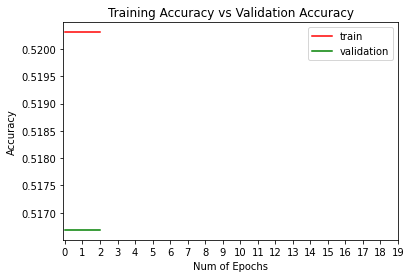

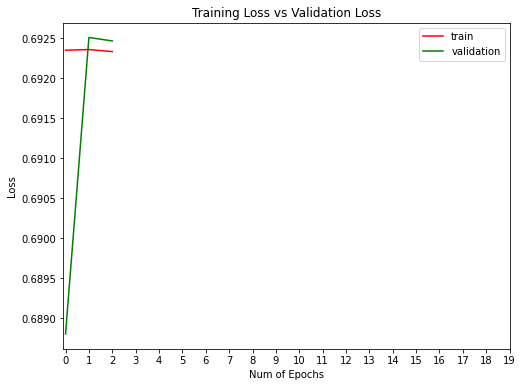

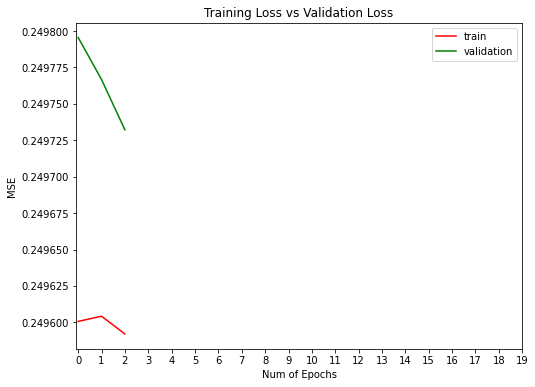

In [93]:
plot_history(history)

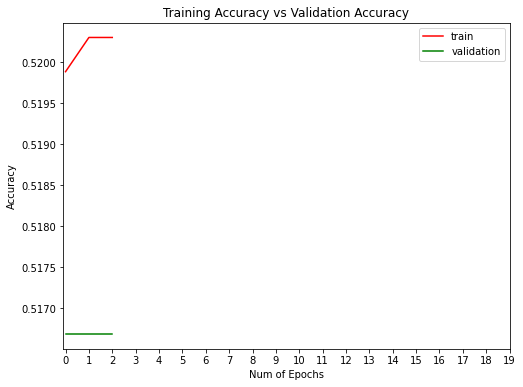

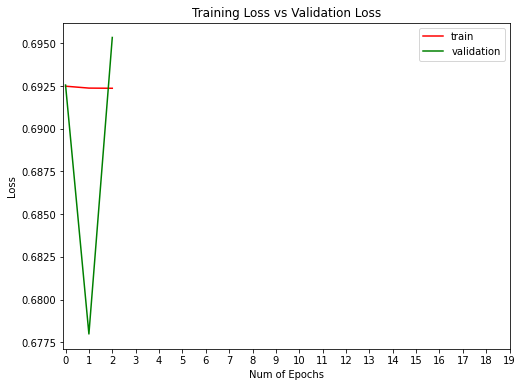

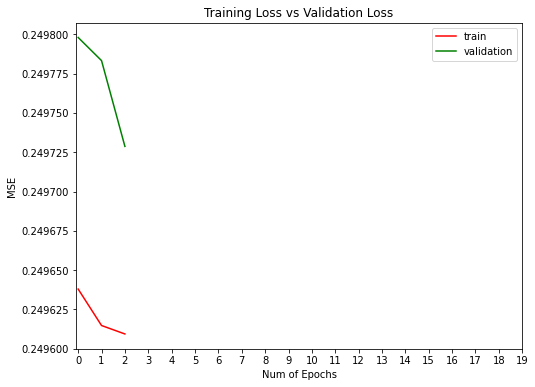

In [94]:
plot_history(history2)

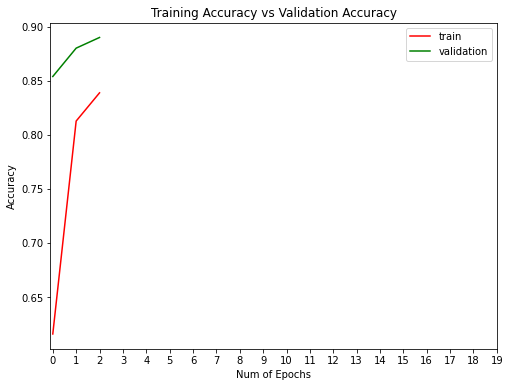

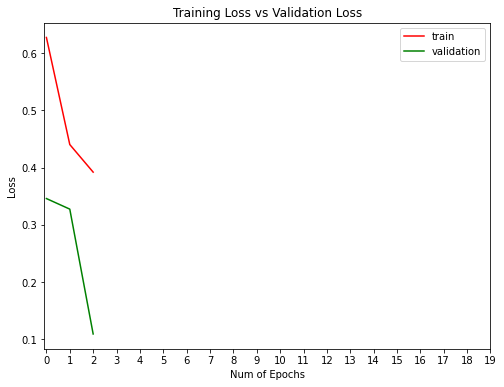

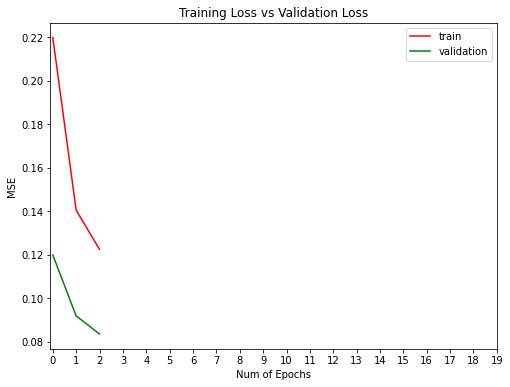

In [95]:
plot_history(history3)

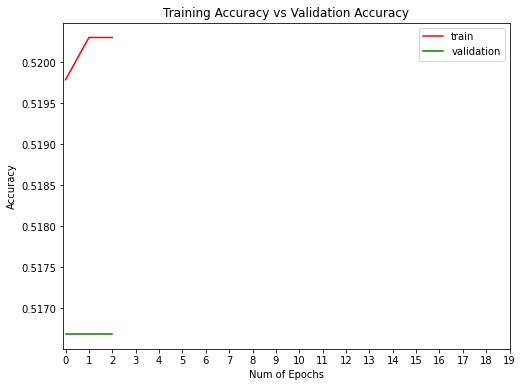

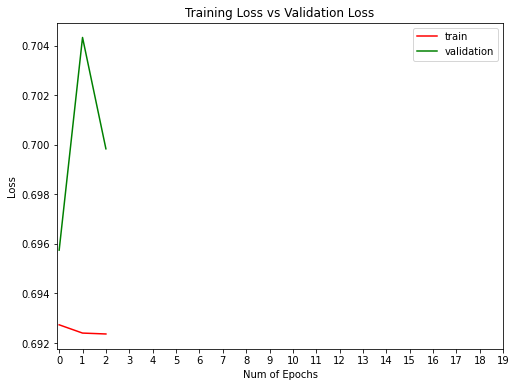

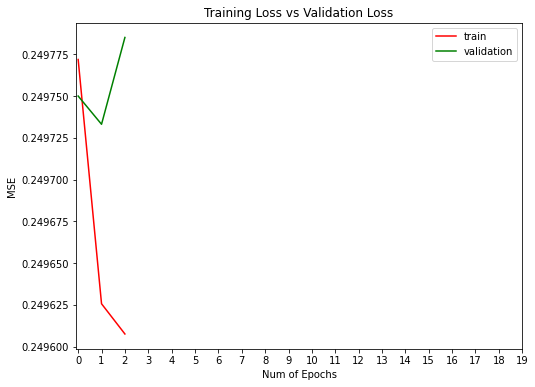

In [96]:
plot_history(history4)

In [ ]:
pred = model.predict_generator(val_generator, steps=None, max_queue_size=10, workers=1, use_multiprocessing=False, verbose=1)  
predicted = np.argmax(pred, axis=1)  

In [ ]:
X_train, y_train = train_generator.next()
X_test, y_test = validation_generator.next()

In [ ]:
display(x_train)
display(y_train)

In [98]:
class_names=['No','Si']

In [186]:
def predict_one(model,generator,sigmoide):  
    generator.reset()
    image_batch, classes_batch = next(generator)
    predicted_batch = model.predict(image_batch)
    for k in range(0,image_batch.shape[0]):
        image = image_batch[k]
        #set_trace()
        pred = predicted_batch[k]
        if sigmoide:
            the_pred=int(round(pred[0]))
        else:
            the_pred = np.argmax(pred)
        predicted = class_names[the_pred]
        val_pred = max(pred)
        #set_trace()
        if sigmoide:
            the_class=int(classes_batch[k])
        else:
            the_class = np.argmax(classes_batch[k])
            
        value = class_names[the_class]
        plt.figure(k)
        isTrue = (the_pred == the_class)
        if sigmoide:
            plt.title(str(isTrue) + ' - class: ' + str(value) + ' - ' + 'predicted: ' + str(predicted)+' Valor arrojado en prediccion: ' + '[' + str(val_pred) + ']')
        else:
            plt.title(str(isTrue) + ' - class: ' + str(value) + ' - ' + 'predicted: ' + str(predicted)+' Con una seguridad de: ' + '[' + str(val_pred) + ']')

        plt.imshow(image)

#predict_one(model)  

<ipython-input-186-4c9318dffed1>:22: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(k)


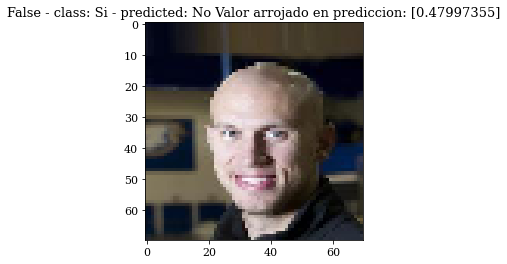

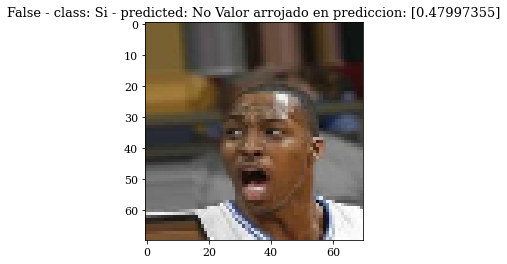

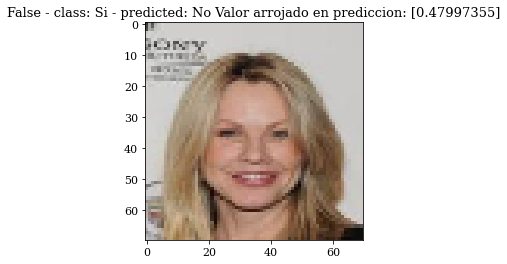

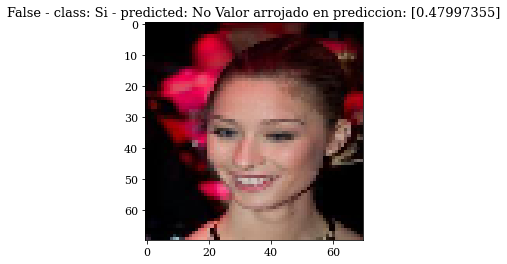

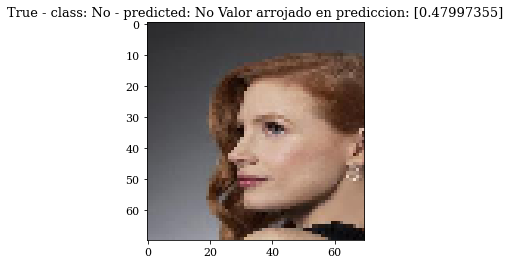

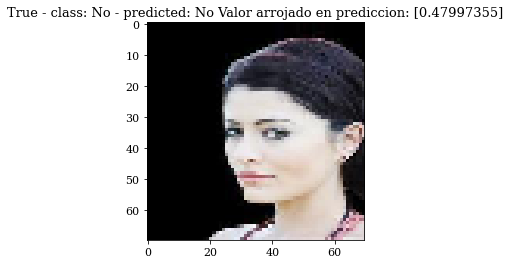

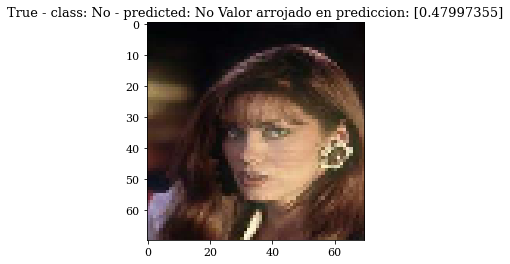

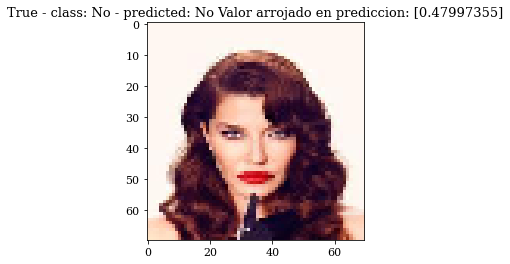

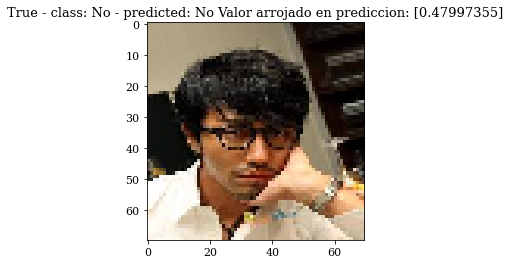

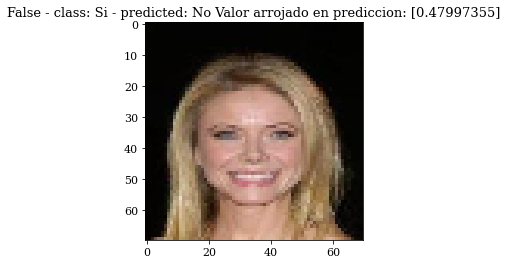

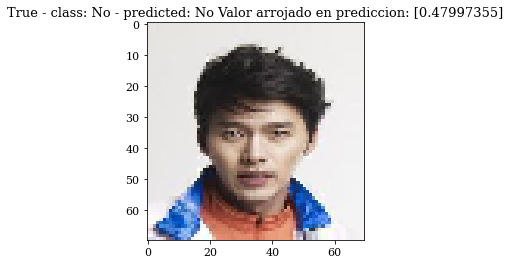

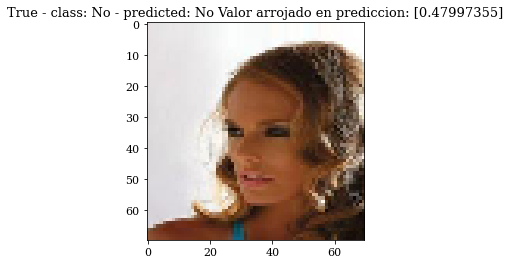

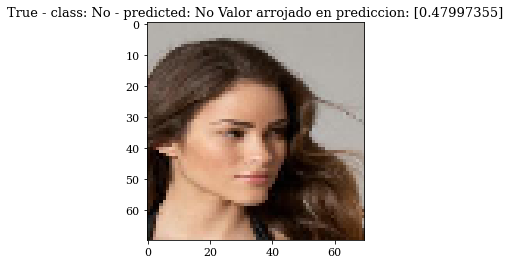

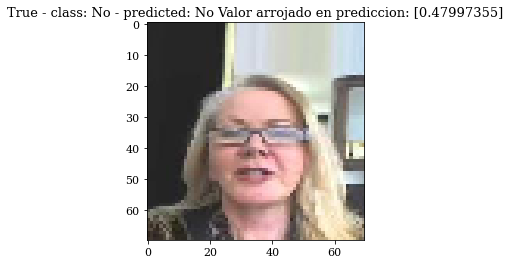

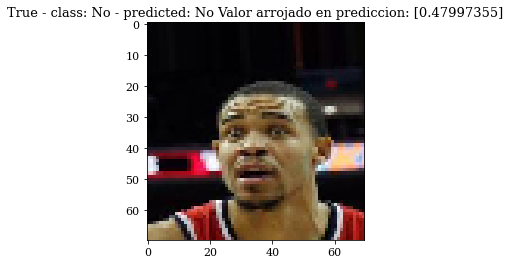

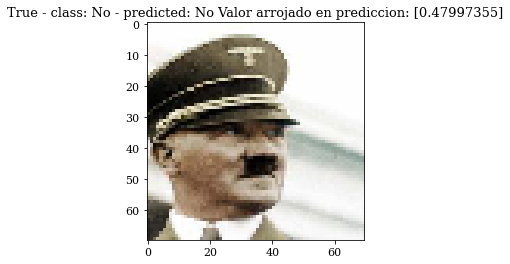

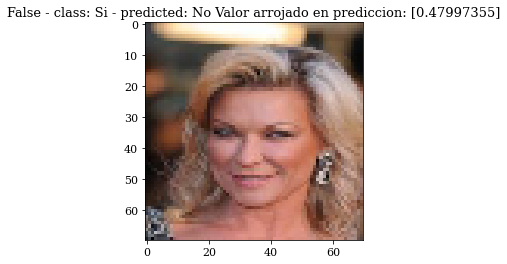

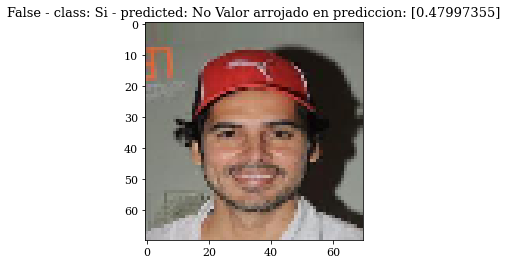

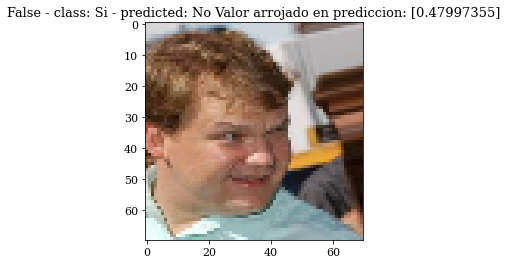

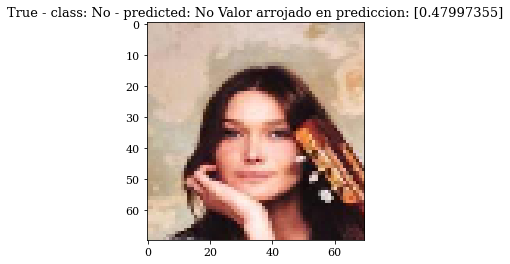

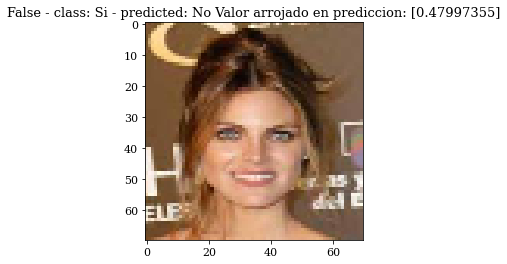

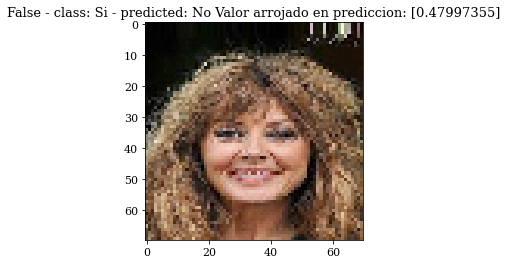

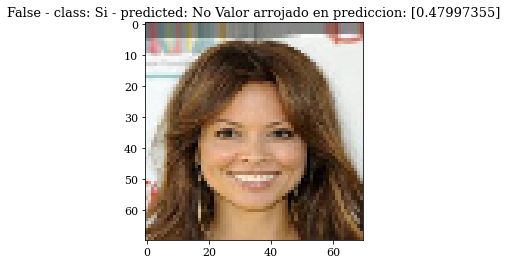

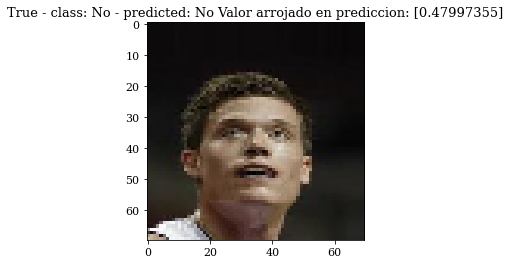

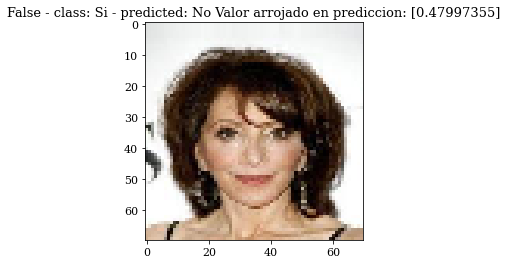

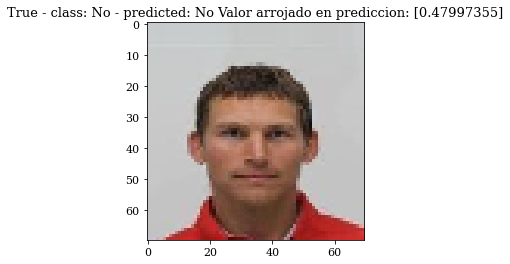

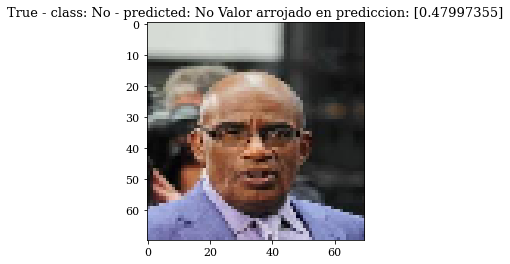

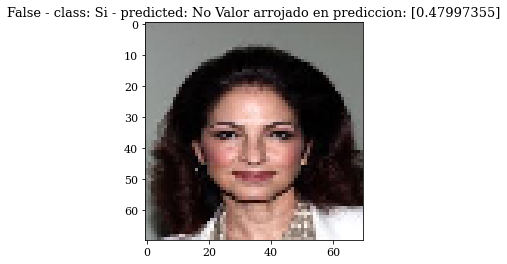

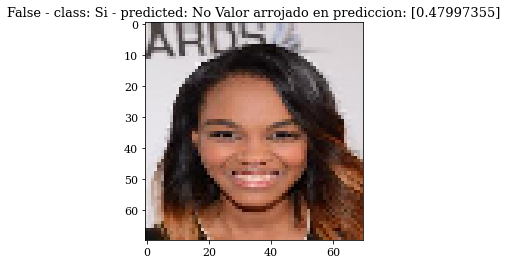

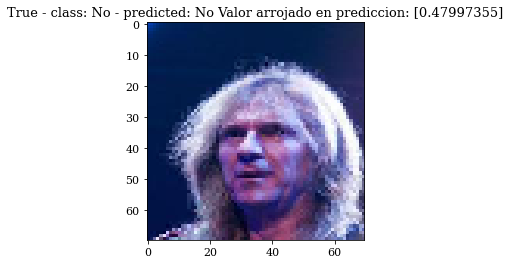

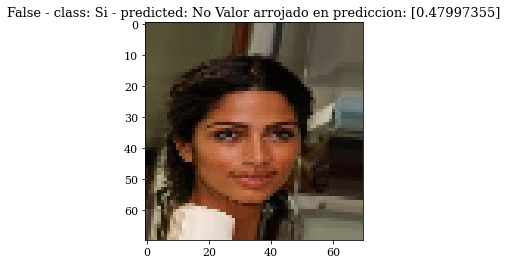

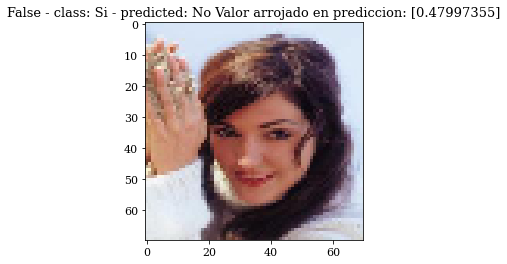

In [187]:
test_generator.reset()
predict_one(model,test_generator,True)

<ipython-input-186-4c9318dffed1>:22: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(k)


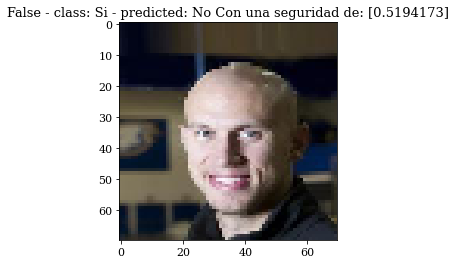

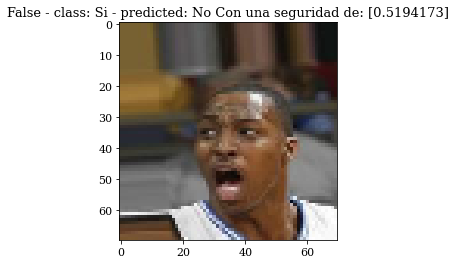

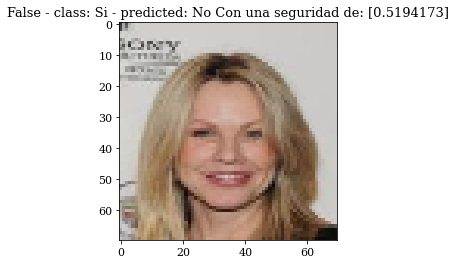

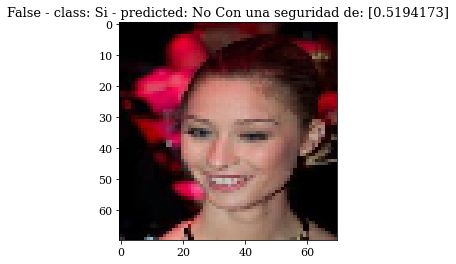

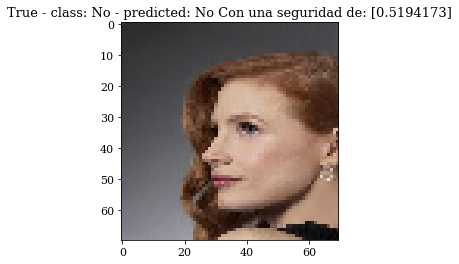

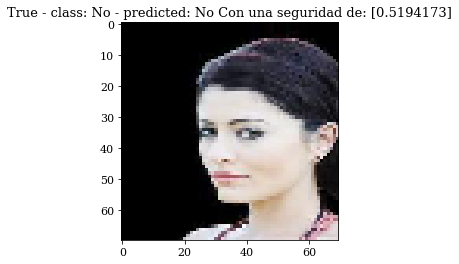

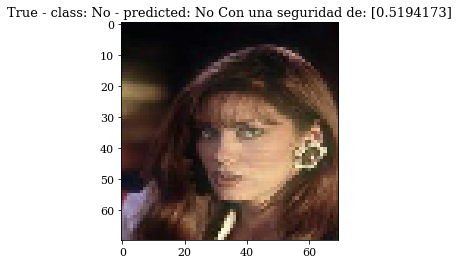

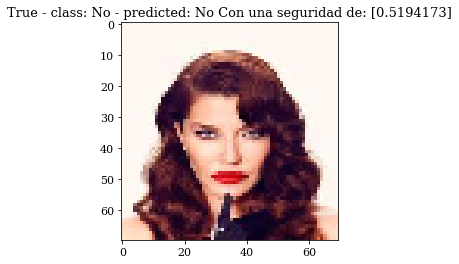

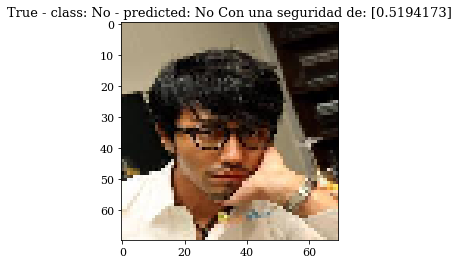

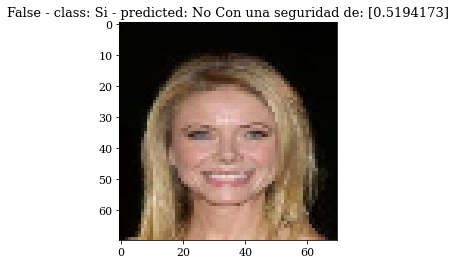

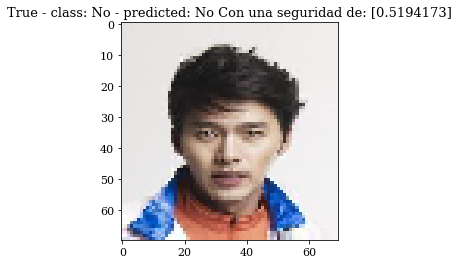

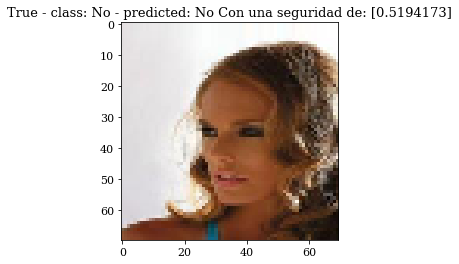

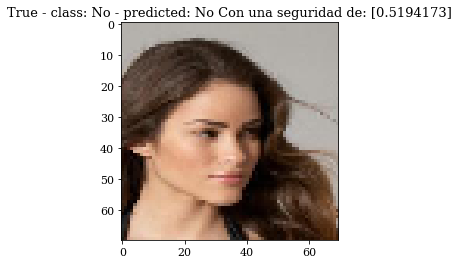

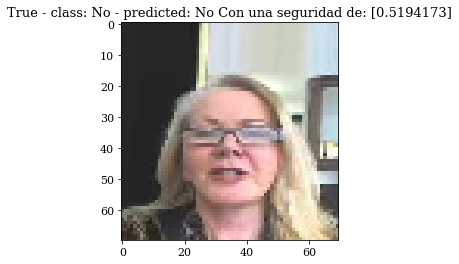

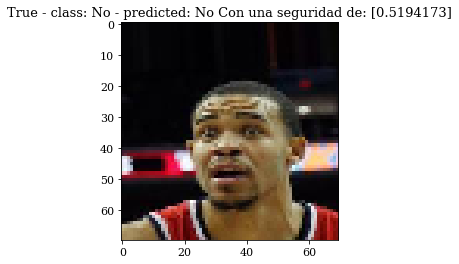

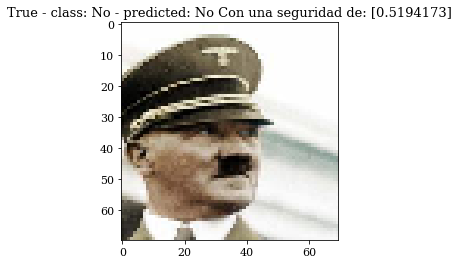

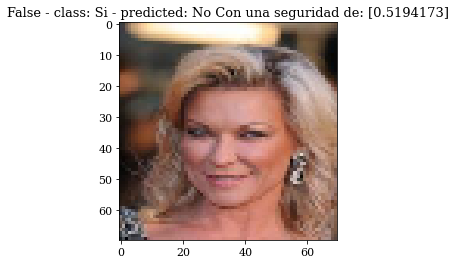

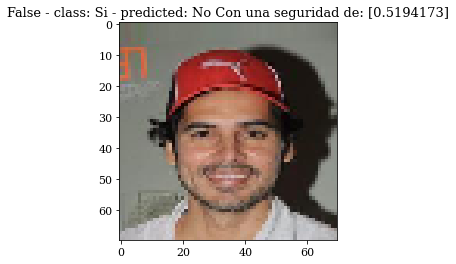

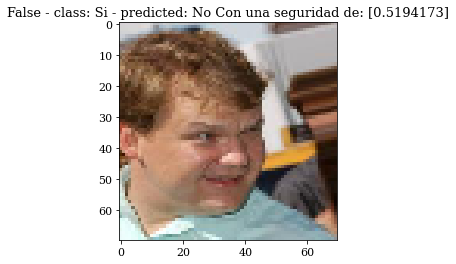

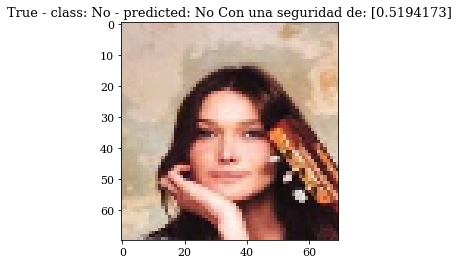

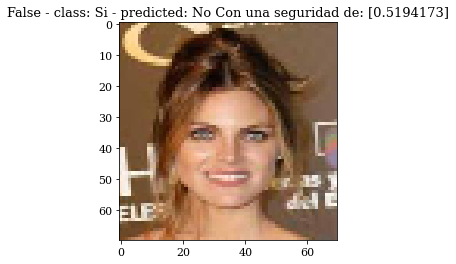

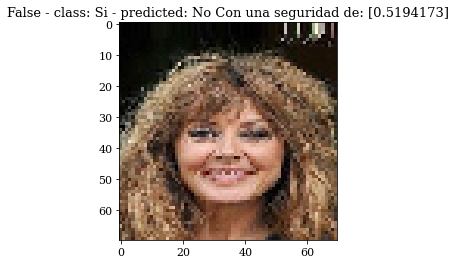

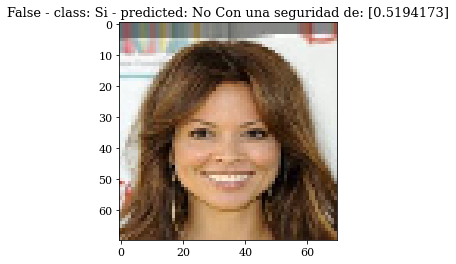

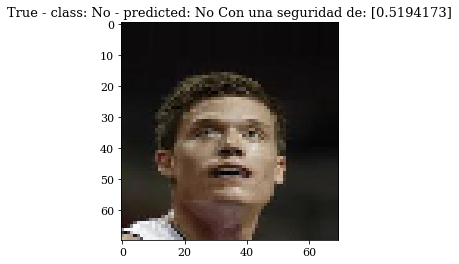

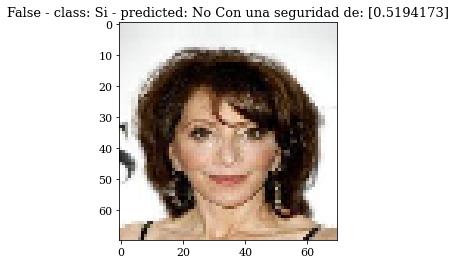

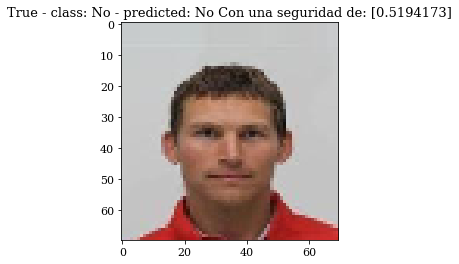

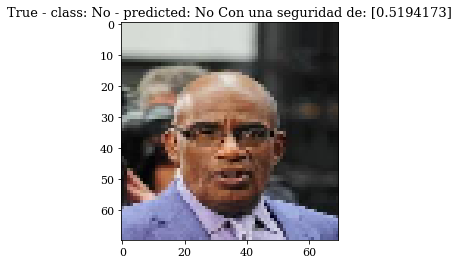

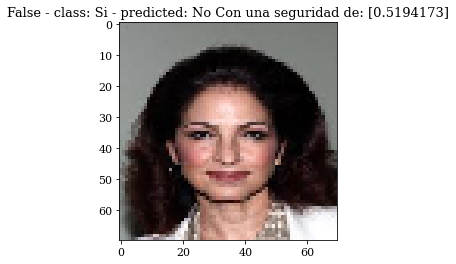

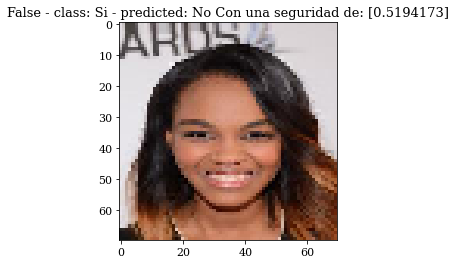

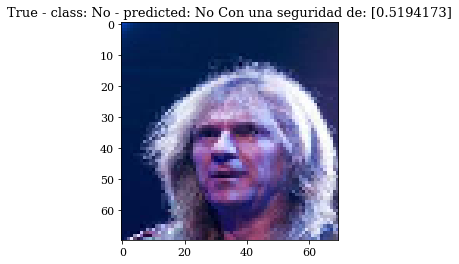

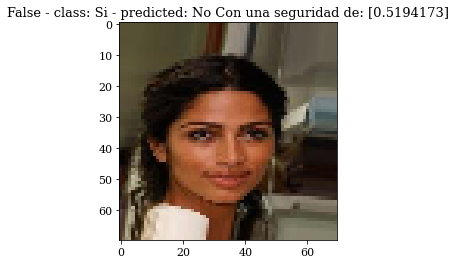

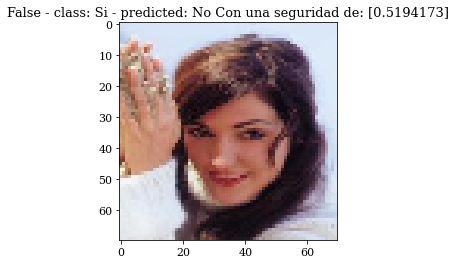

In [188]:
test_generator_categorical.reset()
predict_one(model2,test_generator_categorical,False)

<ipython-input-186-4c9318dffed1>:22: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(k)


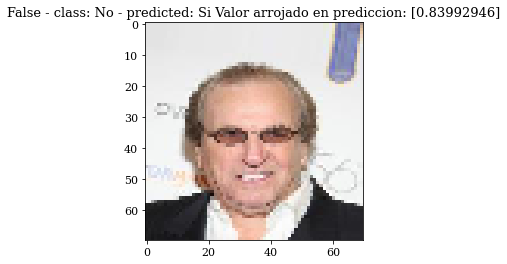

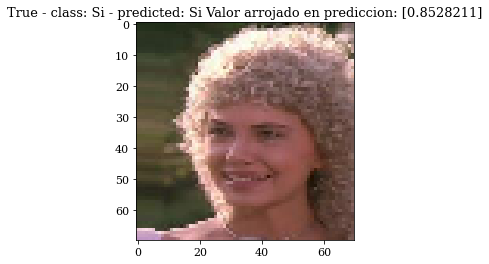

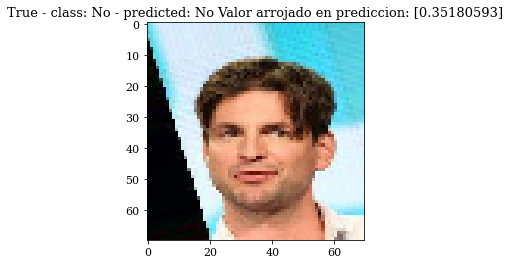

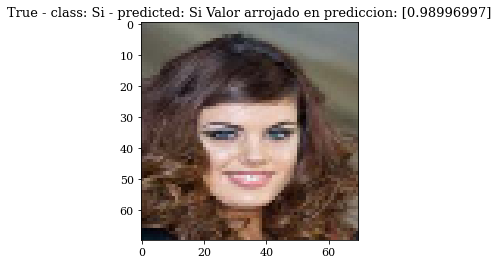

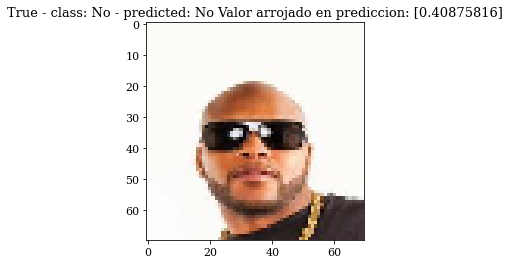

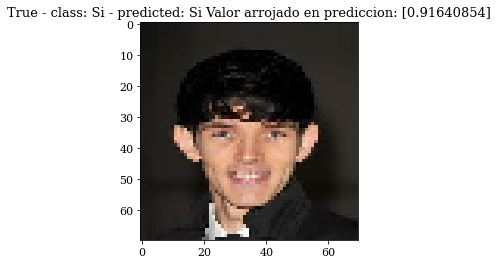

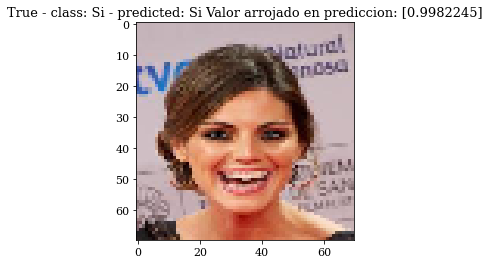

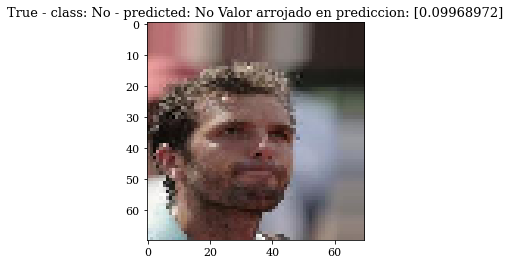

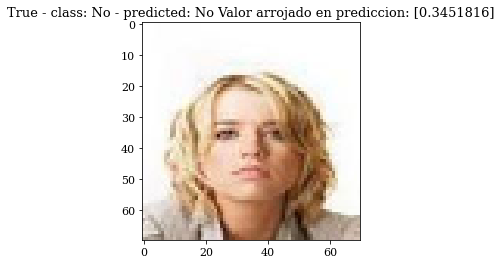

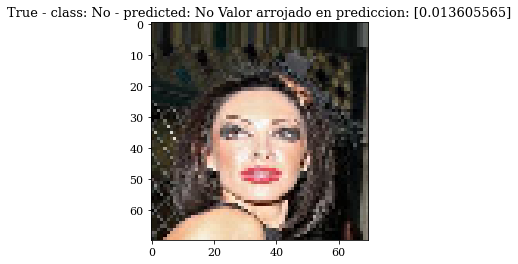

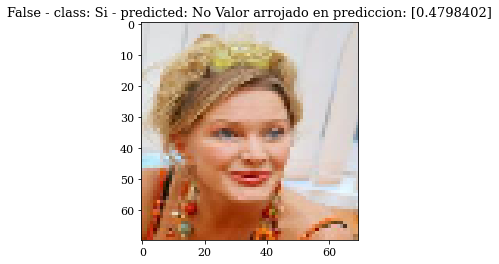

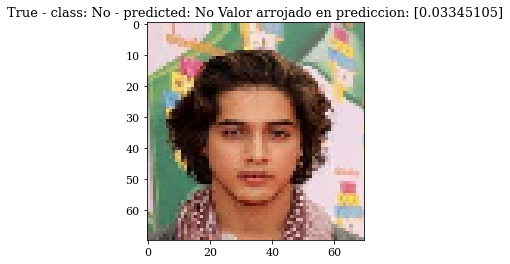

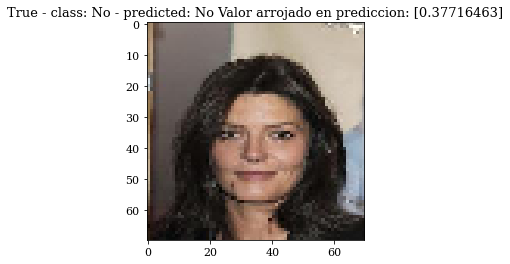

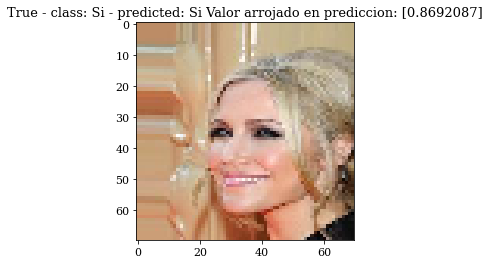

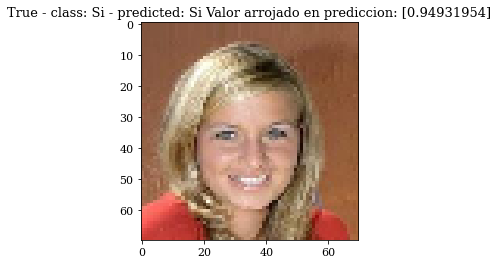

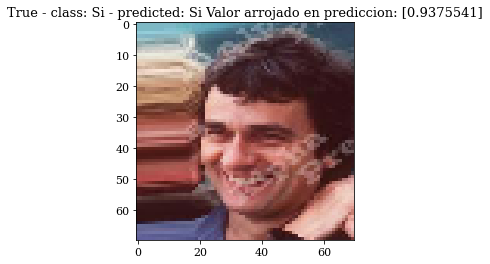

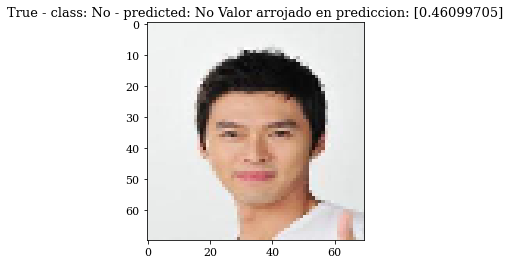

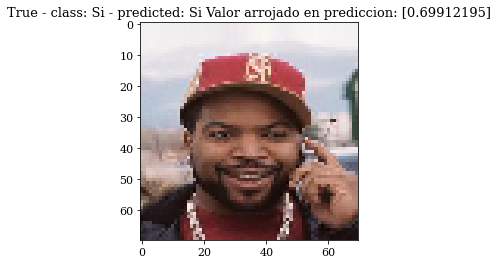

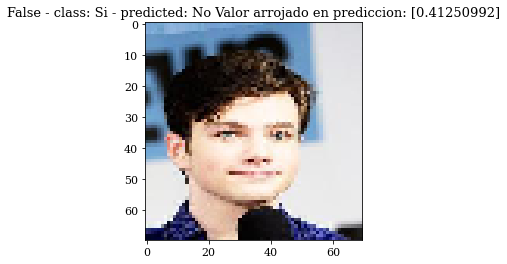

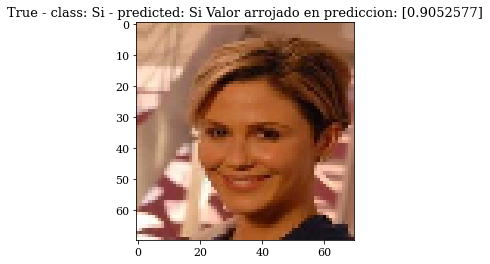

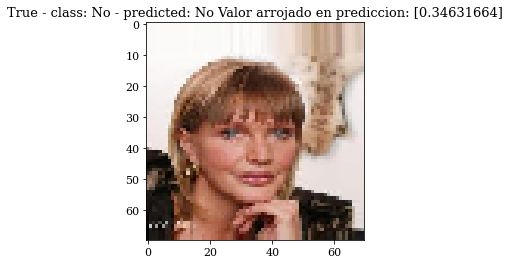

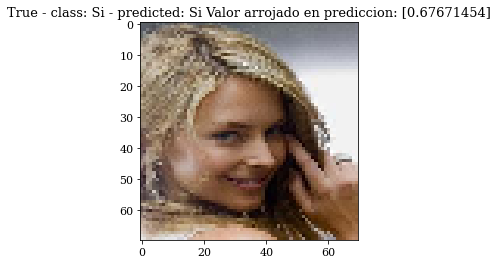

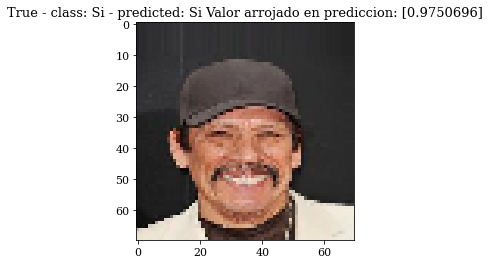

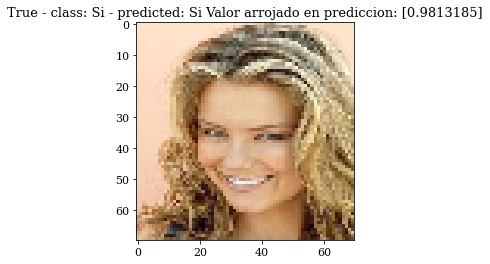

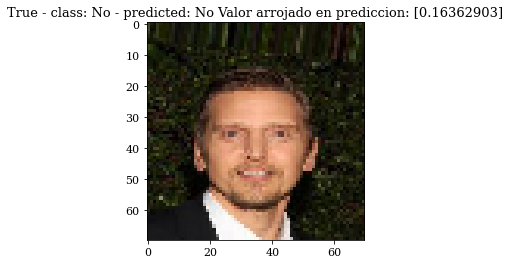

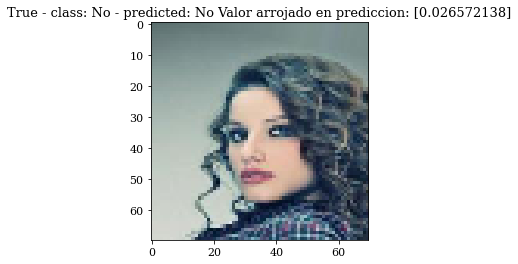

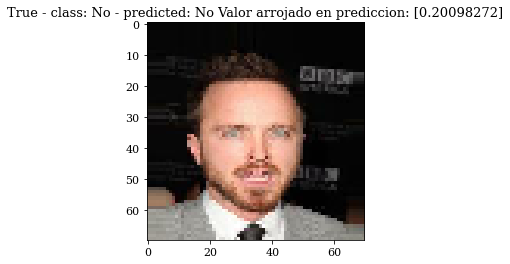

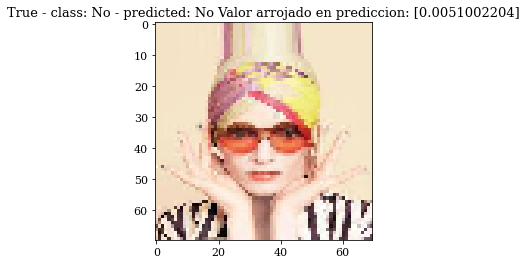

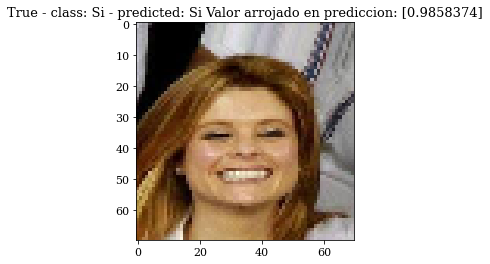

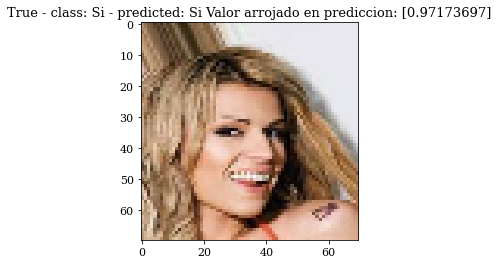

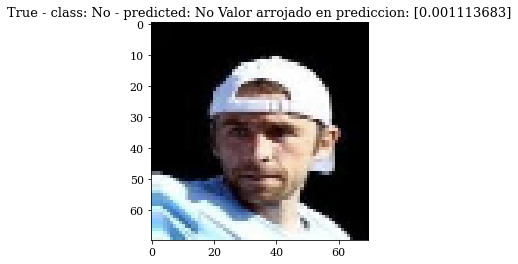

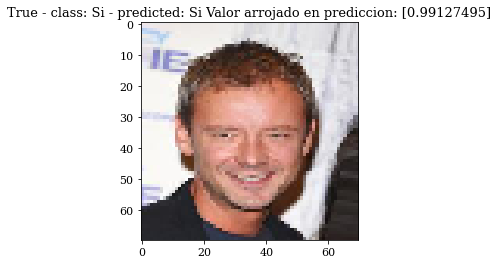

In [189]:
test_generator.reset()
predict_one(model3,test_generator,True)

<ipython-input-186-4c9318dffed1>:22: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(k)


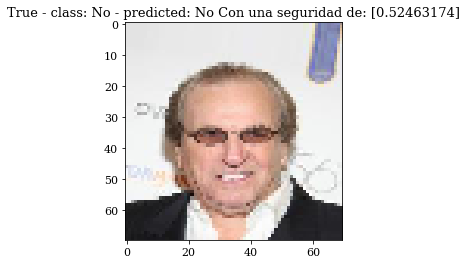

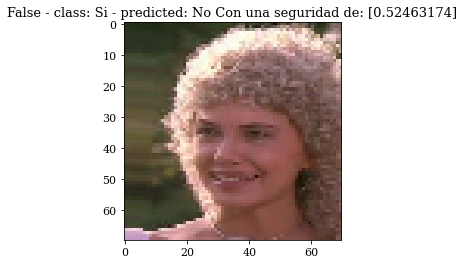

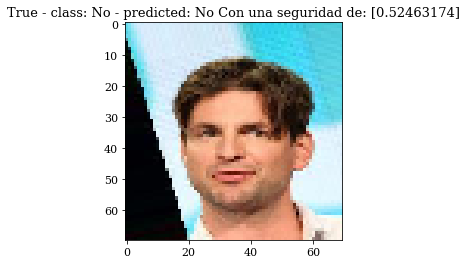

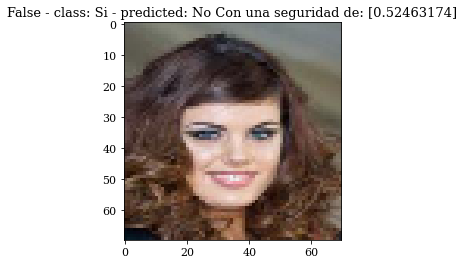

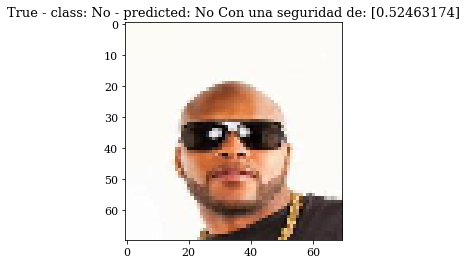

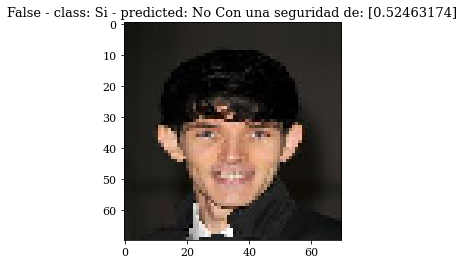

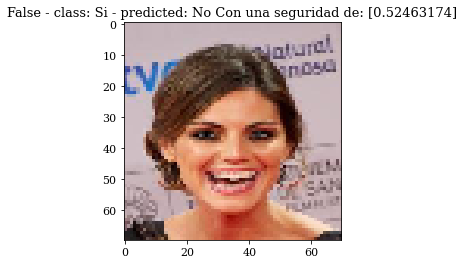

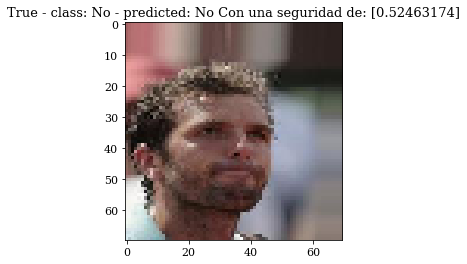

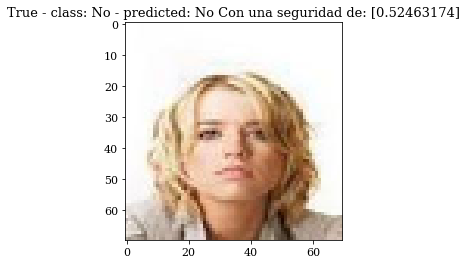

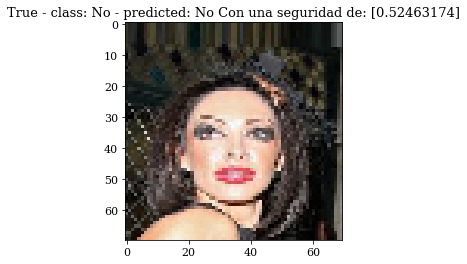

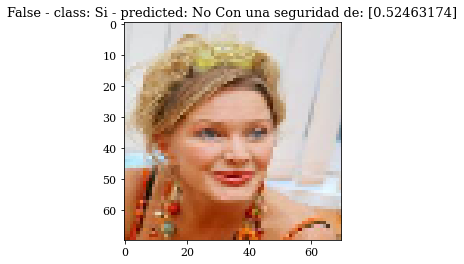

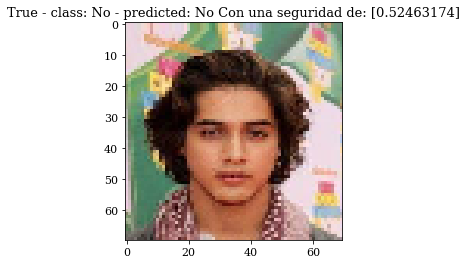

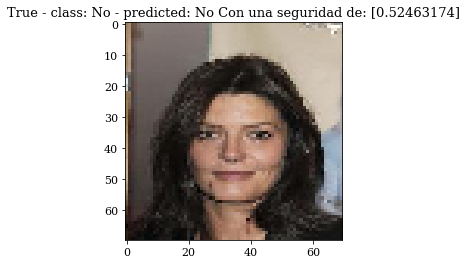

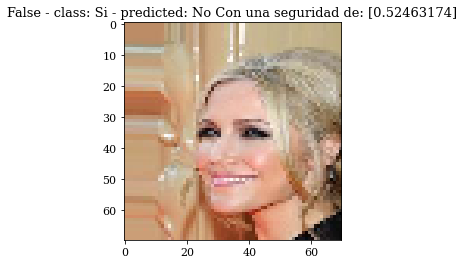

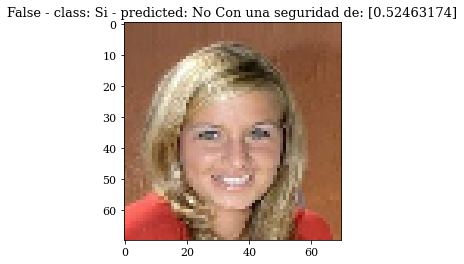

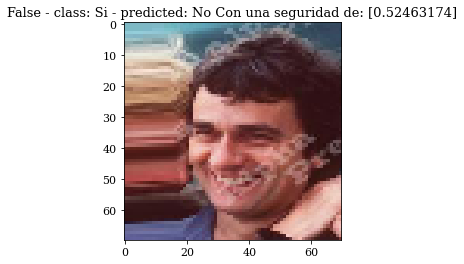

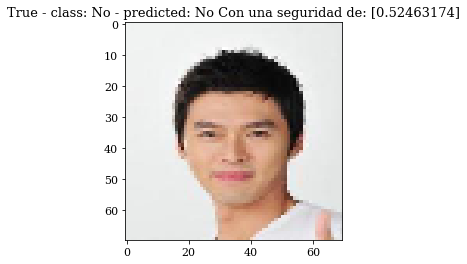

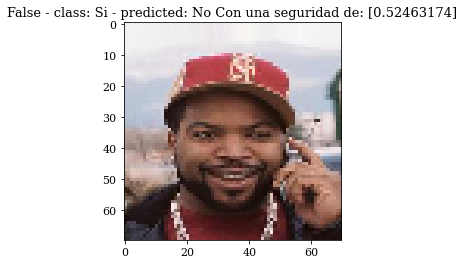

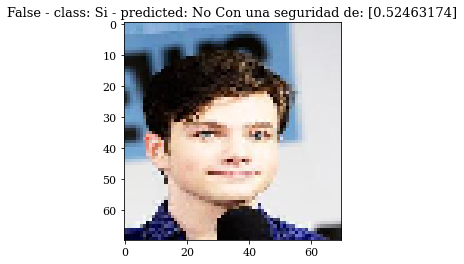

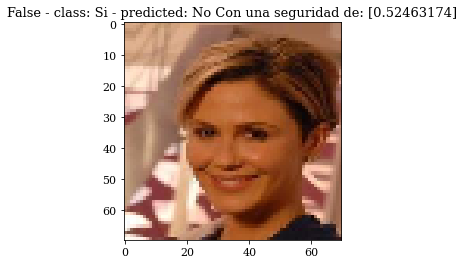

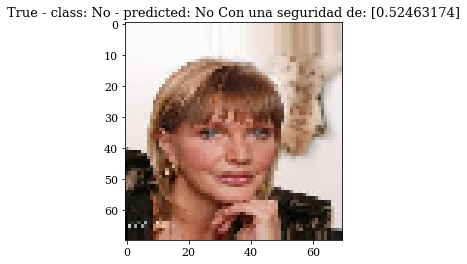

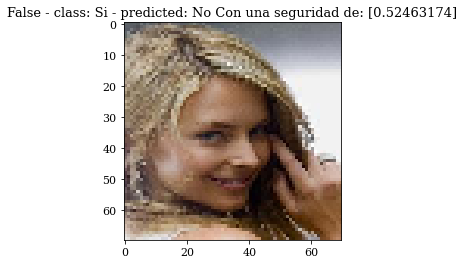

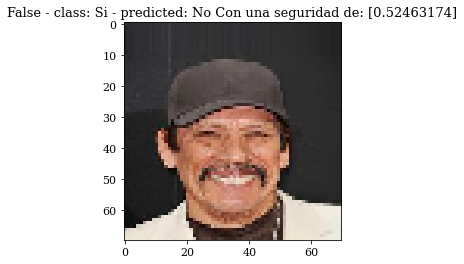

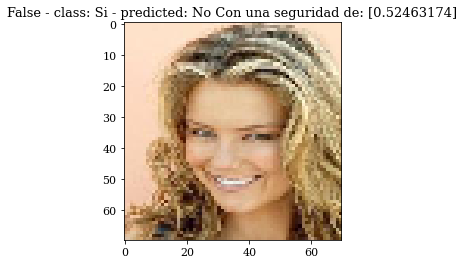

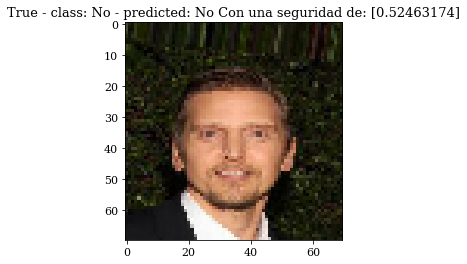

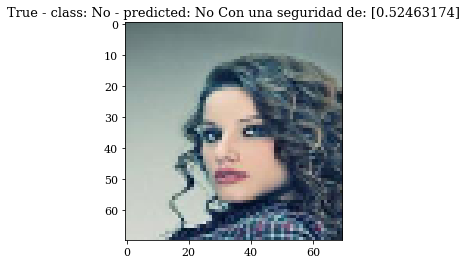

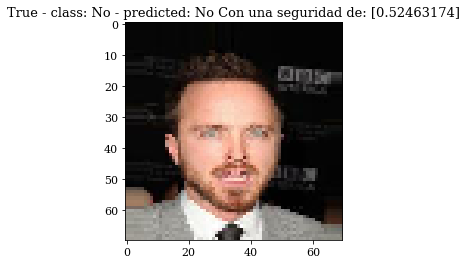

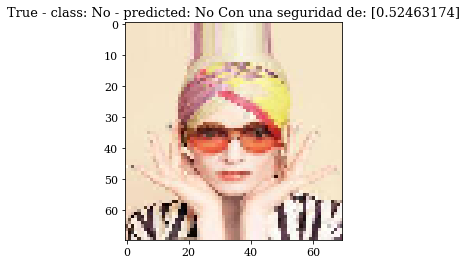

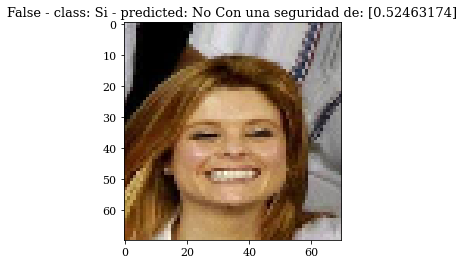

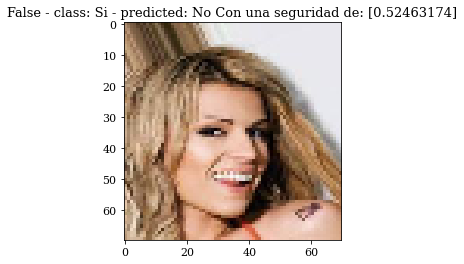

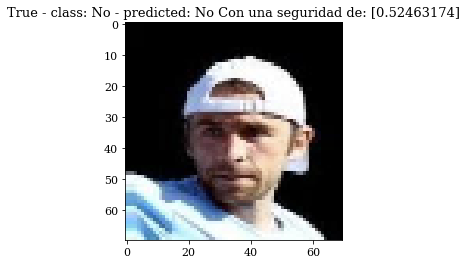

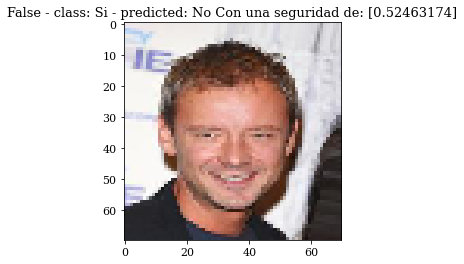

In [190]:
test_generator_categorical.reset()
predict_one(model4,test_generator_categorical,False)

In [73]:
#generators=[('train',train_generator),('test',test_generator)]
#generators=[('test',test_generator)]

In [162]:
#ypred=model.predict(test_generator)
#ypred=model.predict_generator(test_generator,steps=1,verbose=0)
#img,values=test_generator.next()

def evaluate_model(modelo,sigmoid,generators):
    
    for data,generator in generators:
        STEP_SIZE_TEST=generator.n//generator.batch_size
        generator.reset()
        ypred=modelo.predict_generator(generator,steps=STEP_SIZE_TEST+1,verbose=0)
        #set_trace()
        if sigmoid:
            #new_pred=[]
            #for x in ypred:
            #    #set_trace()
            #    a=int(round(x[0],0))
            #    new_pred.append(a)
            new_pred=np.around(ypred)
        else:
            new_pred=np.argmax(ypred, axis=1)
        #set_trace()
        print('#'*20,data,'#' * 20)
        #set_trace()
        print('Accuracy:', accuracy_score(generator.classes, new_pred))    
        cm = confusion_matrix(generator.classes, new_pred)
        # or
        #cm = np.array([[1401,    0],[1112, 0]])

        plt.imshow(cm, cmap=plt.cm.Blues)
        plt.xlabel("Predicted labels")
        plt.ylabel("True labels")
        plt.xticks([0,1],['N','S'],rotation=45)
        plt.yticks([0,1],['N','S'])
        plt.title('Confusion matrix ')
        plt.colorbar()
        plt.show()

In [163]:
generators_categoricals=[['test',test_generator_categorical]]
generators_binary=[['test',test_generator]]
#generators_categoricals=[['train',train_generator_categorical],['test',test_generator_categorical]]
#generators_binary=[['train',train_generator],['test',test_generator]]

#################### test ####################
Accuracy: 0.5166859616449389


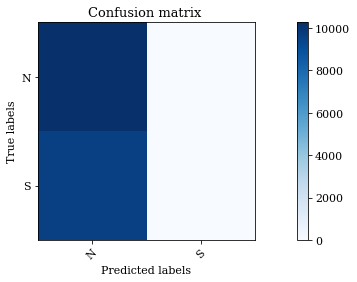

In [182]:
evaluate_model(model,True,generators_binary)

#################### test ####################
Accuracy: 0.5166859616449389


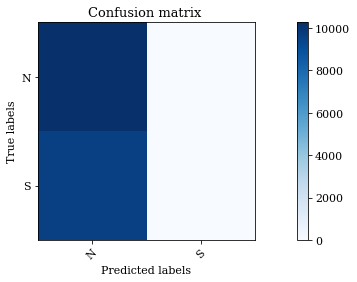

In [183]:
evaluate_model(model2,False,generators_categoricals)

#################### test ####################
Accuracy: 0.49937081592590726


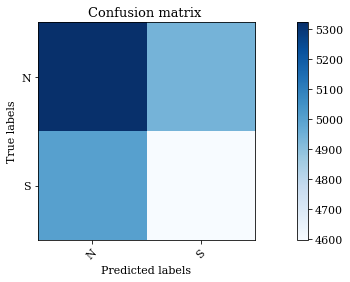

In [184]:
evaluate_model(model3,True,generators_binary)

#################### test ####################
Accuracy: 0.5166859616449389


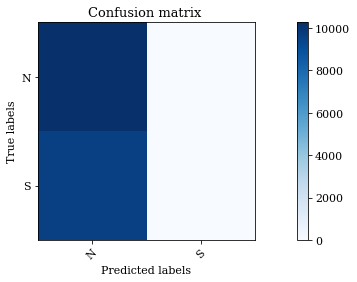

In [185]:
evaluate_model(model4,False,generators_categoricals)

In [169]:
def plot_another_history(history):
    plt.plot(history.history['accuracy'], label='train')
    plt.plot(history.history['val_accuracy'], label='test')
    plt.title('Accuracy over train epochs')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')
    plt.show()

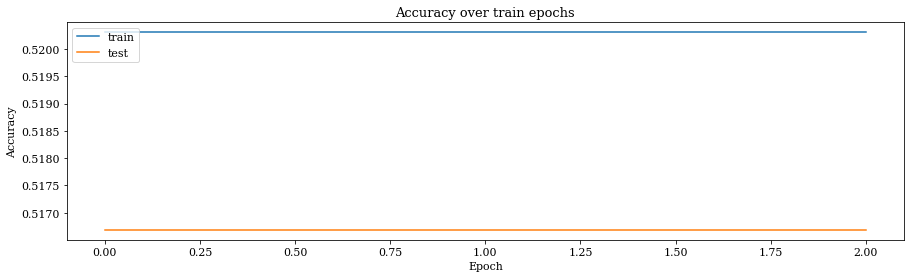

In [170]:
plot_another_history(history)

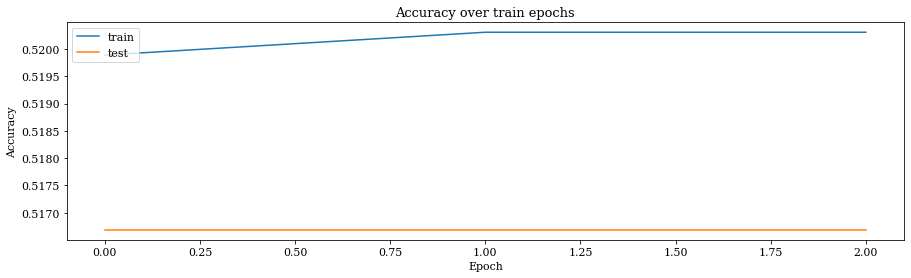

In [171]:
plot_another_history(history2)

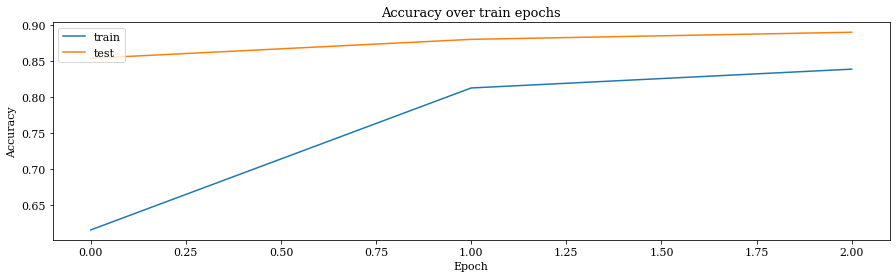

In [172]:
plot_another_history(history3)

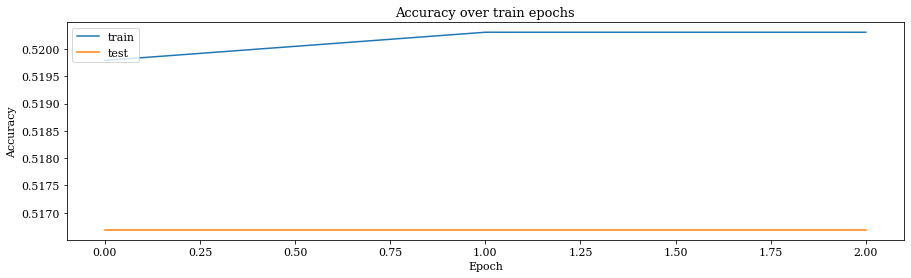

In [173]:
plot_another_history(history4)